<a href="https://colab.research.google.com/github/benmsanderson/esmperspective/blob/main/interpolate_compatible_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pandas as pd

In [16]:
from datetime import date
from matplotlib.dates import DateFormatter

date_form = DateFormatter("%Y")

In [17]:


# read the dataset
df = pd.read_csv("wpd_datasets.csv")


nmd=len(df.columns)/2
ems=pd.DataFrame()
for i in np.arange(0,nmd):
  df0=df.iloc[1:,int(2*i+1):int(2*i+2)].copy()
  mdl=df.columns[int(2*i)]
  df0.set_index(df.iloc[1:,int(2*i)],inplace=True)
  df0.index.name='timestamp'

  #as_list[0] = date(1930,1,1)
  #

  df0.columns=['emissions']
  df0.index = pd.to_datetime(df0.index)
  df1=pd.to_numeric(df0['emissions'])
  df1 = df1[~df1.index.duplicated()]
  df1.sort_index(inplace=True)

  df_reindexed = df1.reindex(pd.date_range(start=date(1930,1,1),end=date(2015,1,1),freq='AS'))
  res = df_reindexed.interpolate(method='pchip', limit_area=None)
  kw = dict(method="quadratic", fill_value="extrapolate")
  ressm=res.rolling(15, win_type='gaussian', center=True).mean(std=10).interpolate(**kw)
  ems[mdl]=ressm

/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/1495218272.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df0.index = pd.to_datetime(df0.index)
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/1495218272.py:22: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  df_reindexed = df1.reindex(pd.date_range(start=date(1930,1,1),end=date(2015,1,1),freq='AS'))
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/1495218272.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df0.index = pd.to_datetime(df0.index)
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/1495218272.py:22: FutureWarning: 'AS' is de

<Axes: >

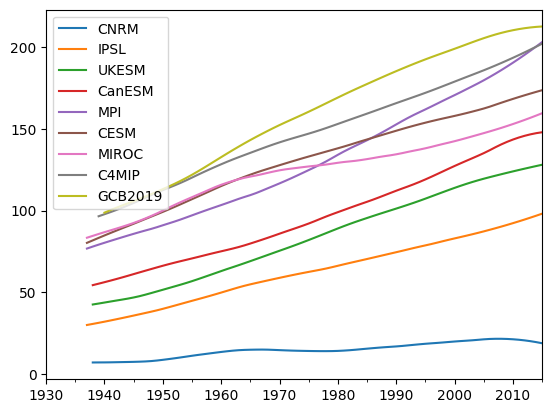

In [18]:
ems.plot()

In [19]:
ems.to_excel("luems0.xlsx",
             sheet_name='emissions')

In [20]:


# read the dataset
df = pd.read_csv("fos_datasets.csv")


nmd=len(df.columns)/2
fos=pd.DataFrame()
for i in np.arange(0,nmd):
  df0=df.iloc[1:,int(2*i+1):int(2*i+2)].copy()
  mdl=df.columns[int(2*i)]
  df0.set_index(df.iloc[1:,int(2*i)],inplace=True)
  df0.index.name='timestamp'
  df0=df0.sort_index()
  as_list = df0.index.tolist()
  #as_list[0] = date(1930,1,1)
  #as_list[-1] = date(2015,1,1)
  df0.index = as_list
  df0.columns=['emissions']
  df0.index = pd.to_datetime(df0.index)
  df1=pd.to_numeric(df0['emissions'])
  df1 = df1[~df1.index.duplicated()]
  df_reindexed = df1.reindex(pd.date_range(start=date(1930,1,1),end=date(2015,1,1),freq='AS'))
  res = df_reindexed.interpolate(method='pchip', limit_area=None)
  kw = dict(method="quadratic", fill_value="extrapolate")
  ressm=res.rolling(15, win_type='gaussian', center=True).mean(std=10).interpolate(**kw)
  fos[mdl]=ressm

/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/1328302709.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df0.index = pd.to_datetime(df0.index)
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/1328302709.py:21: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  df_reindexed = df1.reindex(pd.date_range(start=date(1930,1,1),end=date(2015,1,1),freq='AS'))
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/1328302709.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df0.index = pd.to_datetime(df0.index)
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/1328302709.py:21: FutureWarning: 'AS' is de

<Axes: >

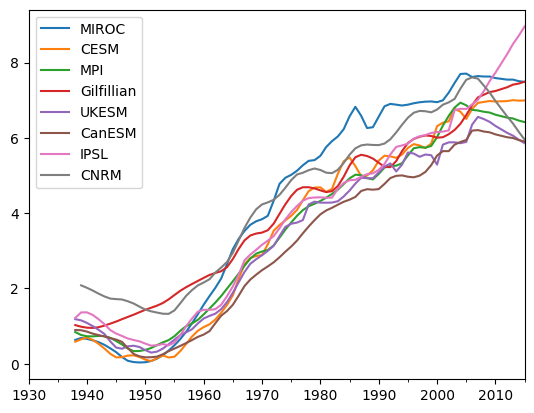

In [21]:
fos.diff().plot()

In [22]:
mdls=['MIROC','CESM','MPI','UKESM','CanESM','IPSL','CNRM']

<Axes: >

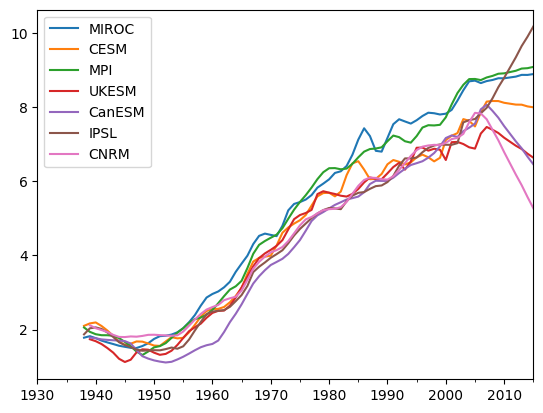

In [23]:
(ems[mdls]+fos[mdls]).diff().plot()

In [24]:
fos.to_excel("fos_ems0.xlsx",
             sheet_name='emissions')

future

In [25]:
mdlf=['ACCESS','CNRM','IPSL','MPI','UKESM','CESM','CanESM','MIROC','NorESM']

In [26]:
fdic={}
for md in mdlf:
  # read the dataset
  df = pd.read_csv("liddicoat/"+md+".csv")


  nmd=len(df.columns)/2
  tmp=pd.DataFrame()
  for i in np.arange(0,nmd):
    df0=df.iloc[1:,int(2*i+1):int(2*i+2)].copy()
    mdl=df.columns[int(2*i)]
    mdl=mdl.lower()
    df0.set_index(df.iloc[1:,int(2*i)],inplace=True)
    df0.index.name='timestamp'
    df0.columns=['emissions']

    if mdl=='hist':
      as_list = df0.index.tolist()
      as_list[0] = date(1986,1,1)
      as_list[-1] = date(2015,1,1)
      dfhist=df0
    else:
      df0=pd.concat([dfhist.dropna(),df0.dropna()])
      as_list = df0.index.tolist()
      as_list[0] = date(1986,1,1)
      as_list[-1] = date(2100,1,1)
    tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
    df0.index = as_list
    df0.index = pd.to_datetime(df0.index)
    df1=pd.to_numeric(df0['emissions'])
    df1 = df1[~df1.index.duplicated()]
    df_reindexed = df1.reindex(tomp)
    res = df_reindexed.interpolate(method='pchip', limit_area=None)
    kw = dict(method="quadratic", fill_value="extrapolate")
    ressm=res.rolling(30, win_type='gaussian', center=True).mean(std=20).interpolate(**kw)

    if mdl!='hist':
     tmp[mdl]=ressm
  fdic[md]=tmp

/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/3354189540.py:27: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/3354189540.py:27: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/3354189540.py:27: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/3354189540.py:27: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  tomp=pd.date_range(start=date(1986,1,1),end=date(2

In [27]:
sspdb=pd.concat(fdic, axis=1)

<Axes: >

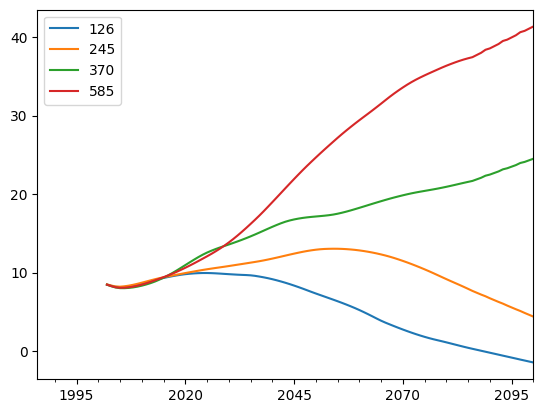

In [28]:
sspdb[md].diff().plot()

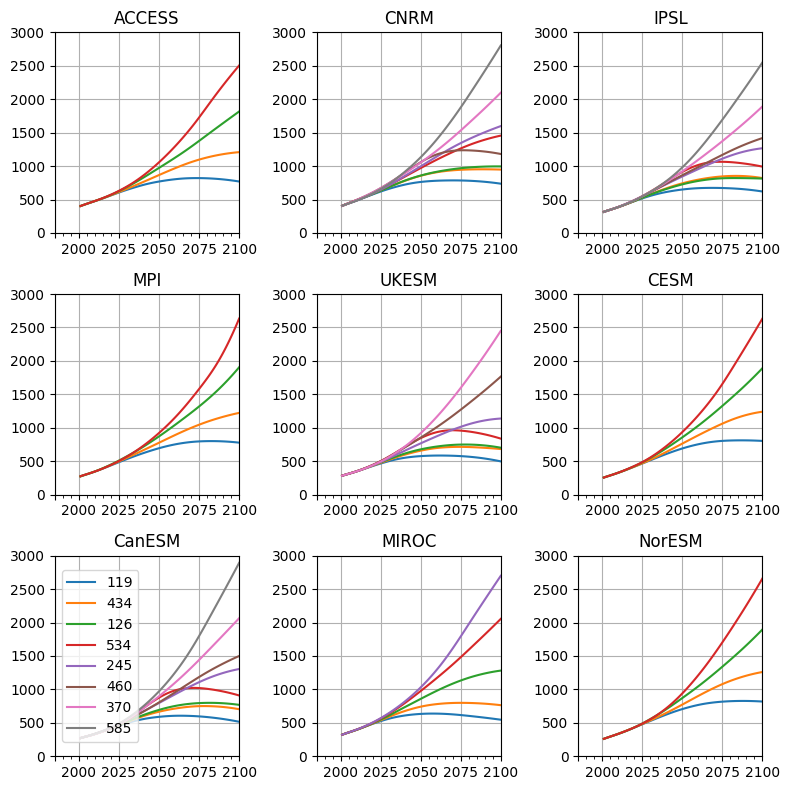

In [29]:
fig, axs = plt.subplots(3,3,figsize=[8,8])
axs=axs.flatten()

for i,md in enumerate(mdlf):

  sspdb[md].plot(ax=axs[i],legend=False)
  axs[i].set_ylim([0,3000])
  axs[i].set_xlim([date(1985,1,1),date(2100,1,1)])
  axs[i].set_xticks([date(1985,1,1),date(2000,1,1),date(2025,1,1),date(2050,1,1),date(2075,1,1),date(2100,1,1)])
  axs[i].set_xticklabels(['','2000','2025','2050','2075','2100'])

  axs[i].set_title(md)
  axs[i].grid()
  if md=='CanESM':
    axs[i].legend(loc='center left')
plt.tight_layout()

In [30]:
mdle=['ACCESS']

In [31]:
from datetime import datetime, timedelta


In [32]:
edic={}
for md in mdlf:
  # read the dataset
  df = pd.read_csv("liddicoat/"+md+"_EM.csv")


  nmd=len(df.columns)/2
  tmp=pd.DataFrame()
  for i in np.arange(0,nmd):
    df0=df.iloc[1:,int(2*i+1):int(2*i+2)].copy()
    mdl=df.columns[int(2*i)]
    mdl=mdl.lower()
    df0.set_index(df.iloc[1:,int(2*i)],inplace=True)
    df0.index.name='timestamp'
    df0.columns=['emissions']
    #df0.index = as_list
    df0=df0.iloc[[np.isnan(x)==0 for x in df0.index.astype('float64')]]
    df0.index = pd.to_datetime(df0.index.astype('float64').astype('int64'),format='%Y')

    if mdl=='hist':
      as_list = df0.index.tolist()
      #as_list[0] = date(1986,1,1)
      #as_list[-1] = date(2015,1,1)
      dfhist=df0
    else:
      df0=pd.concat([dfhist.dropna(),df0.dropna()])
      as_list = df0.index.tolist()
      #as_list[0] = date(1986,1,1)
      #as_list[-1] = date(2100,1,1)
    tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
    df1=pd.to_numeric(df0['emissions'])
    df1 = df1[~df1.index.duplicated()]
    df_reindexed = df1.reindex(tomp)
    res = df_reindexed.interpolate(method='pchip', limit_area=None)
    kw = dict(method="quadratic", fill_value="extrapolate")
    ressm=res#.rolling(10, win_type='gaussian', center=True).mean(std=5).interpolate(**kw)

    if mdl!='hist':
     tmp[mdl]=ressm
  edic[md]=tmp

/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/3569164857.py:30: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/3569164857.py:30: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/3569164857.py:30: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_49476/3569164857.py:30: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  tomp=pd.date_range(start=date(1986,1,1),end=date(2

In [33]:
emisdb=pd.concat(edic, axis=1)

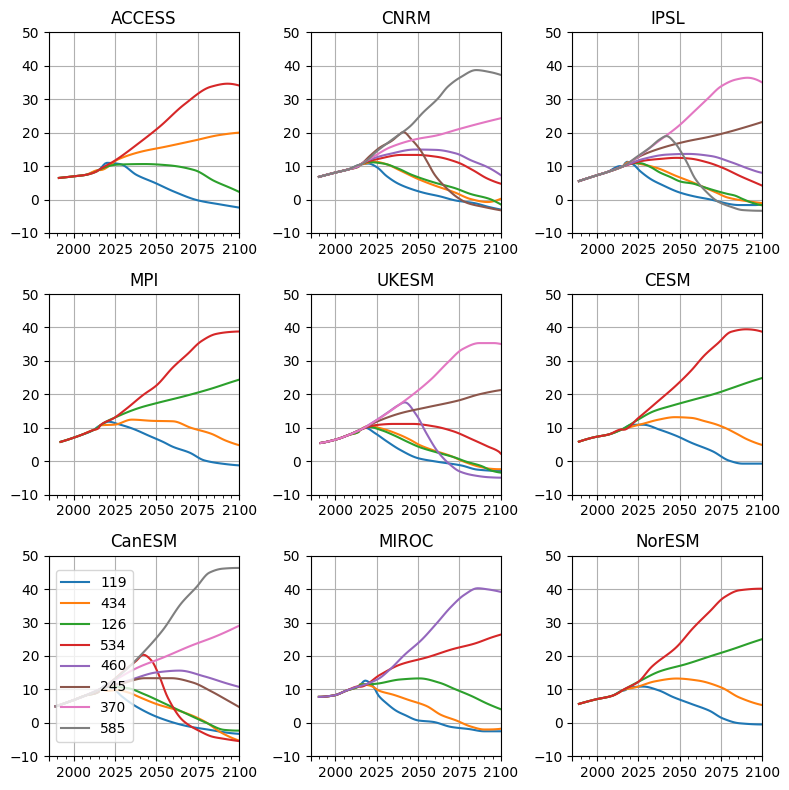

In [34]:
fig, axs = plt.subplots(3,3,figsize=[8,8])
axs=axs.flatten()

for i,md in enumerate(mdlf):

  emisdb[md].plot(ax=axs[i],legend=False)
  axs[i].set_ylim([-10,50])
  axs[i].set_xlim([date(1985,1,1),date(2100,1,1)])
  axs[i].set_xticks([date(1985,1,1),date(2000,1,1),date(2025,1,1),date(2050,1,1),date(2075,1,1),date(2100,1,1)])
  axs[i].set_xticklabels(['','2000','2025','2050','2075','2100'])

  axs[i].set_title(md)
  axs[i].grid()
  if md=='CanESM':
    axs[i].legend(loc='center left')
plt.tight_layout()


In [35]:
mdlf

['ACCESS', 'CNRM', 'IPSL', 'MPI', 'UKESM', 'CESM', 'CanESM', 'MIROC', 'NorESM']

<Axes: >

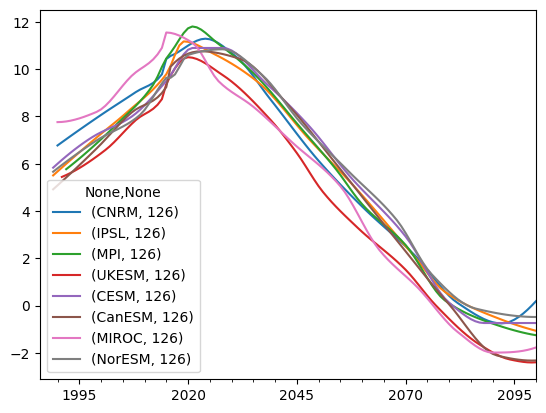

In [36]:
axs=plt.gca()
emisdb[mdlf].loc[:, pd.IndexSlice[:, ['126']]].plot(ax=axs)



In [37]:
scns=['119','126','245','370','534','585']
fullnm={'MIROC':'MIROC-ES2L','CESM':'CESM2','MPI':'MPI-ESM1-2-LR','UKESM':'UKESM1-0-LL','CanESM':'CanESM5','IPSL':'IPSL-CM6A-LR','CNRM':'CNRM-ESM2-1','NorESM':'NorESM2'}

In [38]:
fos

,MIROC,CESM,MPI,Gilfillian,UKESM,CanESM,IPSL,CNRM
1930-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011-01-01,338.834148,286.417775,298.402569,335.993753,308.803115,298.372029,338.592665,432.515594
2012-01-01,346.380773,293.393867,304.939107,343.336518,314.936771,304.388762,346.813245,439.085523
2013-01-01,353.927580,300.394769,311.454317,350.749029,320.995428,310.384014,355.302771,445.467649
2014-01-01,361.433328,307.382223,317.912599,358.190779,326.945978,316.325024,364.014854,451.627097


In [39]:
sdict={}
for s in scns:
  for i in np.arange(0,10):

    if i==0:
      tmp=(pd.concat([fos[mdls].diff()[date(1940,1,1):date(1990+i,1,1)],emisdb[mdls].xs(s, axis=1, level=1)[date(1991+i,1,1):]]))
    else:
      tmp=tmp+(pd.concat([fos[mdls].diff()[date(1940,1,1):date(1990+i,1,1)],emisdb[mdls].xs(s, axis=1, level=1)[date(1991+i,1,1):]]))
  tmp=tmp/10
  tmp=tmp.rename(columns=fullnm)
  if s=='534':
    nm='ssp534-over'
  else:
    nm='ssp'+s
  sdict[nm]=tmp
scendb=pd.concat(sdict, axis=1)

In [40]:
gcb=pd.read_excel("Global_Carbon_Budget_2022v1.0.xlsx", sheet_name="Historical Budget",skiprows=15,index_col=0)
gcb.index = pd.to_datetime(gcb.index, format='%Y').year


In [41]:
gcb

,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
Year,,,,,,,
1750,0.002552,NaN,NaN,NaN,0.232276,NaN,NaN
1751,0.002552,NaN,-0.074340,NaN,-0.505378,NaN,NaN
1752,0.002553,NaN,-0.070729,NaN,-0.222229,NaN,NaN
1753,0.002553,NaN,-0.067756,NaN,-0.380279,NaN,NaN
1754,0.002554,NaN,-0.064145,NaN,-0.022557,NaN,NaN
...,...,...,...,...,...,...,...
2017,9.851730,1.182300,4.545360,2.854828,3.555004,0.202927,-0.124088
2018,10.050902,1.141200,5.033880,2.947231,3.647435,0.209702,-0.646145
2019,10.120786,1.243800,5.437440,2.994756,3.041949,0.214002,-0.323561


In [42]:
scendb.index.year

Index([1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int32', length=161)

In [43]:
scendb['ssp119'].columns
cols=['r','y','g','b','c','violet','orange']
cmap = dict(zip(scendb['ssp119'].columns, cols))

In [44]:
scendb['ssp126'].iloc[-1].dropna().index.to_list()

['MIROC-ES2L',
 'CESM2',
 'MPI-ESM1-2-LR',
 'UKESM1-0-LL',
 'CanESM5',
 'IPSL-CM6A-LR',
 'CNRM-ESM2-1']

In [45]:
scendb.T.to_csv("scen_ems.csv")

ssp_em=pd.read_excel('sspfos.xlsx',index_col=0)


In [68]:
ssp_em

,ssp119,ssp126,ssp245,ssp370,ssp534,ssp585
1765,0.003046,0.003046,0.003046,0.003046,0.003046,0.003046
1766,0.003396,0.003396,0.003396,0.003396,0.003396,0.003396
1767,0.003397,0.003397,0.003397,0.003397,0.003397,0.003397
1768,0.003398,0.003398,0.003398,0.003398,0.003398,0.003398
1769,0.003400,0.003400,0.003400,0.003400,0.003400,0.003400
...,...,...,...,...,...,...
2496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


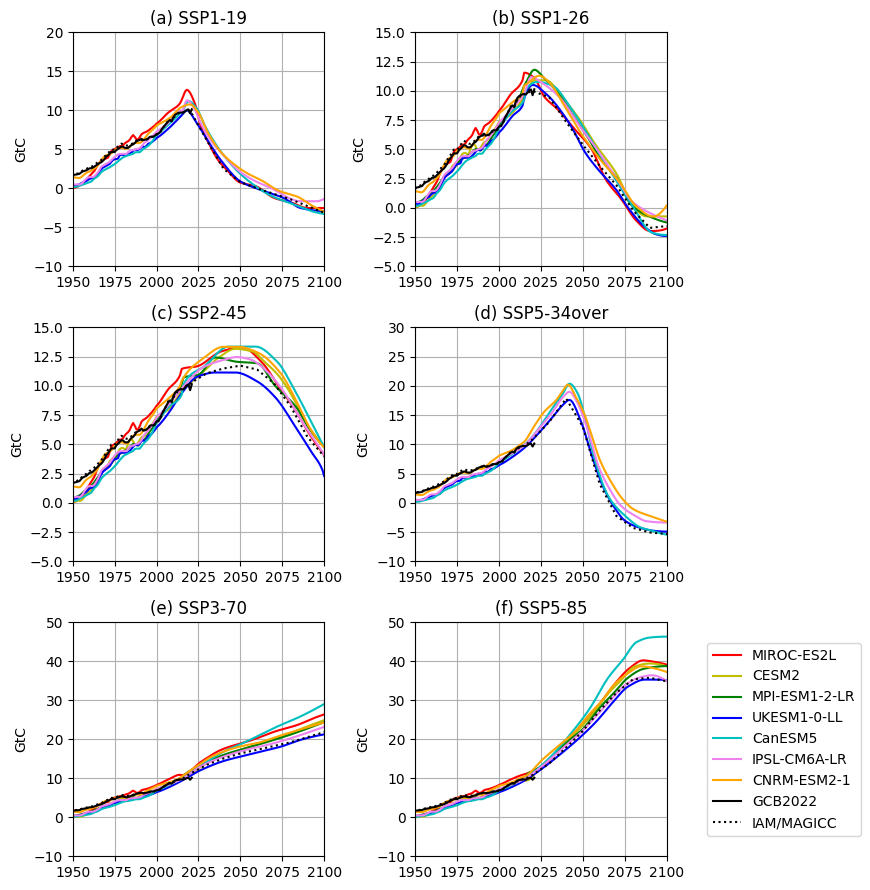

In [46]:

fig, axs = plt.subplots(3,2,figsize=[7,9])
#fig.suptitle('Compatible Fossil Fuel emissions in CMIP6')
axs=axs.flatten()
#ems[mdls].plot(ax=axs[0])
scn='ssp119'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[0].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[0].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

#axs[0].legend()
axs[0].set_xlim([1950,2100])
axs[0].grid()
axs[0].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[0].set_ylim([-10,50])
axs[0].set_ylim([-10,20])

axs[0].set_title('(a) SSP1-19')
axs[0].set_ylabel('GtC')

scn='ssp126'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[1].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[1].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[0].legend()
axs[1].set_xlim([1950,2100])
axs[1].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[1].grid()
axs[1].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[1].set_ylim([-5,15])

axs[1].set_title('(b) SSP1-26')
axs[1].set_ylabel('GtC')

scn='ssp245'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[2].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[2].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[1].legend()
axs[2].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[2].set_xlim([1950,2100])
axs[2].grid()
axs[2].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[2].set_ylim([-5,15])

axs[2].set_title('(c) SSP2-45')
axs[2].set_ylabel('GtC')

scn='ssp534-over'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[3].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[3].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[2].legend()
axs[3].set_xlim([1950,2100])
axs[3].set_ylim([-10,30])
axs[3].plot(ssp_em.index,ssp_em['ssp534'],'k:',label='IAM/MAGICC')

axs[3].grid()
axs[3].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])

axs[3].set_title('(d) SSP5-34over')
axs[3].set_ylabel('GtC')

scn='ssp370'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[4].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[4].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[4].legend()
axs[4].set_xlim([1950,2100])
axs[4].grid()
axs[4].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[4].set_ylim([-10,50])
axs[4].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[4].set_title('(e) SSP3-70')
axs[4].set_ylabel('GtC')

scn='ssp585'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[5].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[5].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')

axs[5].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')
axs[5].set_xlim([1950,2100])
axs[5].grid()
axs[5].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[5].set_ylim([-10,50])

axs[5].set_title('(f) SSP5-85')
axs[5].set_ylabel('GtC')
plt.tight_layout()
axs[5].legend(loc='right',bbox_to_anchor=(1.8, .5))


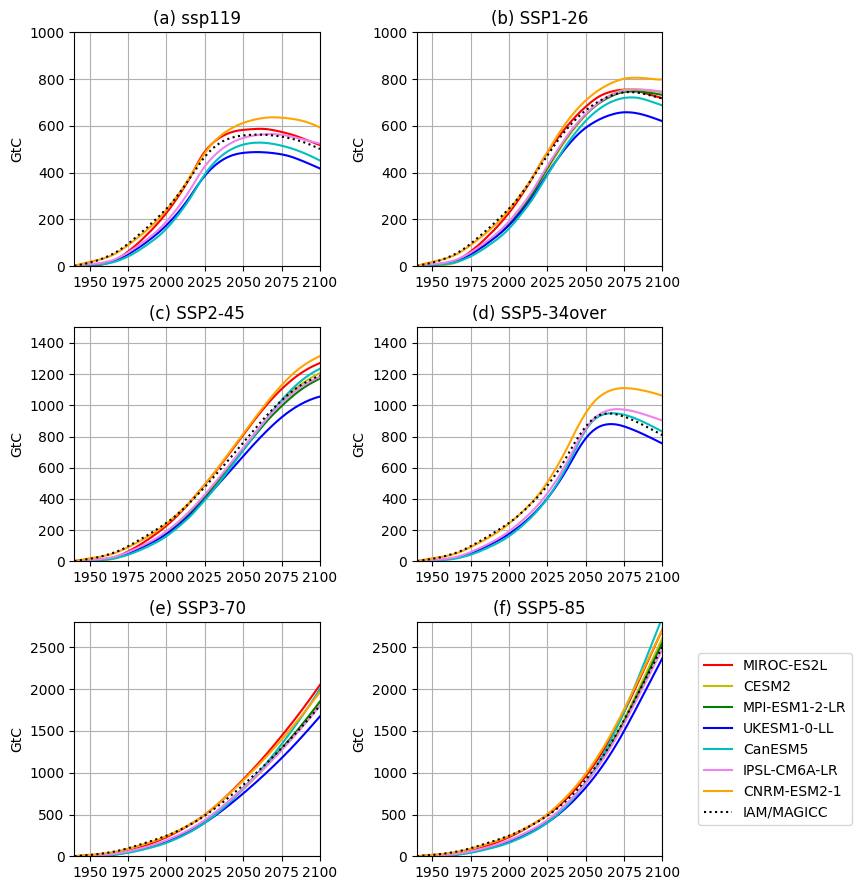

In [116]:

fig, axs = plt.subplots(3,2,figsize=[7,9])
#fig.suptitle('Compatible Fossil Fuel emissions in CMIP6')
axs=axs.flatten()
#ems[mdls].plot(ax=axs[0])
scn='ssp119'
f=0
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[0].plot(scendb.index.year,np.cumsum(scendb[scn][md]),label=md,color=cmap[md])
#axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[0].plot(ssp_em.iloc[175:336].index,np.cumsum(ssp_em[scn].iloc[175:336]),'k:',label='IAM/MAGICC')

#axs[0].legend()
axs[0].set_xlim([1940,2100])
axs[0].grid()
axs[0].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[0].set_ylim([0,1000])
axs[0].set_ylim([0,1000])

axs[0].set_title('(a) '+scn)
axs[0].set_ylabel('GtC')

scn='ssp126'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[1].plot(scendb.index.year,np.cumsum(scendb[scn][md]),label=md,color=cmap[md])
#axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[1].plot(ssp_em.iloc[175:336].index,np.cumsum(ssp_em[scn].iloc[175:336]),'k:',label='IAM/MAGICC')

axs[1].grid()
axs[1].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[1].set_ylim([0,1000])
axs[1].set_xlim([1940,2100])

axs[1].set_title('(b) SSP1-26')
axs[1].set_ylabel('GtC')

scn='ssp245'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[2].plot(scendb.index.year,np.cumsum(scendb[scn][md]),label=md,color=cmap[md])
#axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[2].plot(ssp_em.iloc[175:336].index,np.cumsum(ssp_em[scn].iloc[175:336]),'k:',label='IAM/MAGICC')

axs[2].set_xlim([1940,2100])
axs[2].grid()
axs[2].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[2].set_ylim([0,1500])

axs[2].set_title('(c) SSP2-45')
axs[2].set_ylabel('GtC')

scn='ssp534'
use=scendb['ssp534-over'].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[3].plot(scendb.index.year,np.cumsum(scendb['ssp534-over'][md]),label=md,color=cmap[md])
#axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[3].plot(ssp_em.iloc[175:336].index,np.cumsum(ssp_em[scn].iloc[175:336]),'k:',label='IAM/MAGICC')

axs[3].set_xlim([1940,2100])
axs[3].set_ylim([0,1500])

axs[3].grid()
axs[3].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])

axs[3].set_title('(d) SSP5-34over')
axs[3].set_ylabel('GtC')

scn='ssp370'
use=scendb[scn].iloc[-1].dropna().index.to_list()
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[4].plot(scendb.index.year,np.cumsum(scendb[scn][md]),label=md,color=cmap[md])
#axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[4].plot(ssp_em.iloc[175:336].index,np.cumsum(ssp_em[scn].iloc[175:336]),'k:',label='IAM/MAGICC')

axs[4].set_xlim([1940,2100])
axs[4].grid()
axs[4].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[4].set_ylim([0,2800])

axs[4].set_title('(e) SSP3-70')
axs[4].set_ylabel('GtC')

scn='ssp585'
uuse=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[5].plot(scendb.index.year,np.cumsum(scendb[scn][md]),label=md,color=cmap[md])
#axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[5].plot(ssp_em.iloc[175:336].index,np.cumsum(ssp_em[scn].iloc[175:336]),'k:',label='IAM/MAGICC')

axs[5].set_xlim([1940,2100])
axs[5].grid()
axs[5].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[5].set_ylim([0,2800])

axs[5].set_title('(f) SSP5-85')
axs[5].set_ylabel('GtC')
plt.tight_layout()
axs[5].legend(loc='right',bbox_to_anchor=(1.8, .5))


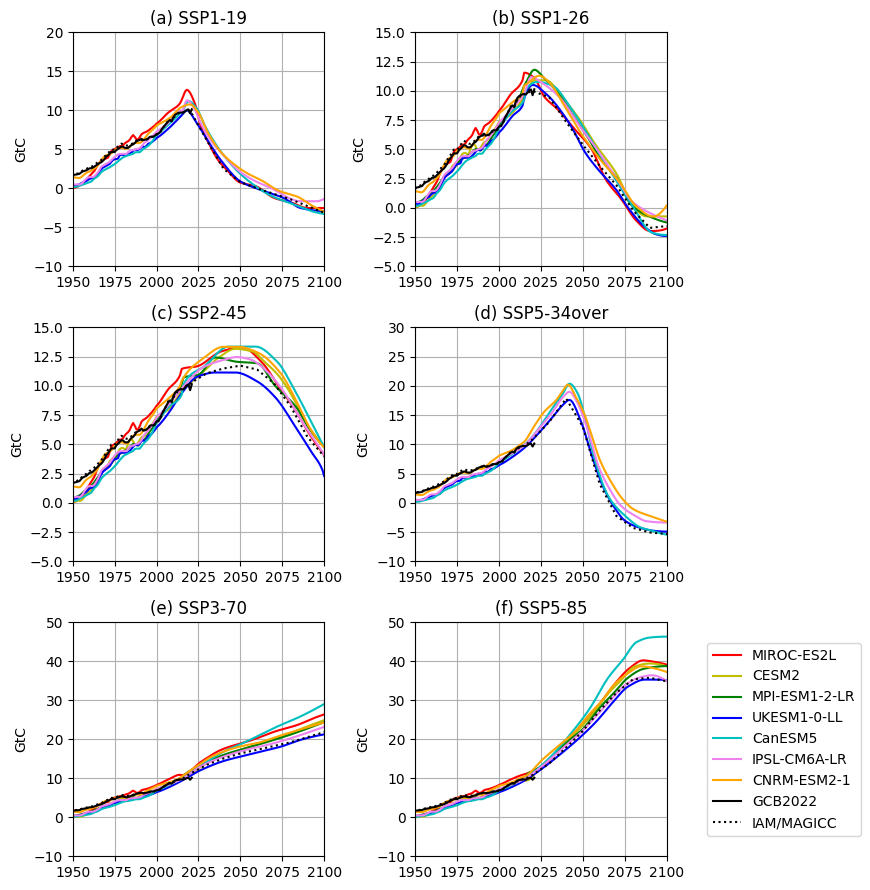

In [ ]:

fig, axs = plt.subplots(3,2,figsize=[7,9])
#fig.suptitle('Compatible Fossil Fuel emissions in CMIP6')
axs=axs.flatten()
#ems[mdls].plot(ax=axs[0])
scn='ssp119'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[0].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[0].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

#axs[0].legend()
axs[0].set_xlim([1950,2100])
axs[0].grid()
axs[0].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[0].set_ylim([-10,50])
axs[0].set_ylim([-10,20])

axs[0].set_title('(a) SSP1-19')
axs[0].set_ylabel('GtC')

scn='ssp126'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[1].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[1].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[0].legend()
axs[1].set_xlim([1950,2100])
axs[1].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[1].grid()
axs[1].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[1].set_ylim([-5,15])

axs[1].set_title('(b) SSP1-26')
axs[1].set_ylabel('GtC')

scn='ssp245'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[2].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[2].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[1].legend()
axs[2].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[2].set_xlim([1950,2100])
axs[2].grid()
axs[2].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[2].set_ylim([-5,15])

axs[2].set_title('(c) SSP2-45')
axs[2].set_ylabel('GtC')

scn='ssp534-over'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[3].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[3].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[2].legend()
axs[3].set_xlim([1950,2100])
axs[3].set_ylim([-10,30])
axs[3].plot(ssp_em.index,ssp_em['ssp534'],'k:',label='IAM/MAGICC')

axs[3].grid()
axs[3].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])

axs[3].set_title('(d) SSP5-34over')
axs[3].set_ylabel('GtC')

scn='ssp370'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[4].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[4].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[4].legend()
axs[4].set_xlim([1950,2100])
axs[4].grid()
axs[4].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[4].set_ylim([-10,50])
axs[4].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[4].set_title('(e) SSP3-70')
axs[4].set_ylabel('GtC')

scn='ssp585'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[5].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[5].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')

axs[5].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')
axs[5].set_xlim([1950,2100])
axs[5].grid()
axs[5].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[5].set_ylim([-10,50])

axs[5].set_title('(f) SSP5-85')
axs[5].set_ylabel('GtC')
plt.tight_layout()
axs[5].legend(loc='right',bbox_to_anchor=(1.8, .5))


In [104]:
scendb

ssp119                                                \
           MIROC-ES2L     CESM2 MPI-ESM1-2-LR UKESM1-0-LL   CanESM5   
1940-01-01   0.660385  0.699282      0.729828    1.085414  0.854292   
1941-01-01   0.622232  0.633625      0.728515    0.999483  0.799942   
1942-01-01   0.574573  0.529013      0.739124    0.901515  0.760916   
1943-01-01   0.502884  0.403692      0.736124    0.791505  0.724055   
1944-01-01   0.410305  0.266074      0.689210    0.593916  0.681174   
...               ...       ...           ...         ...       ...   
2096-01-01  -2.527076       NaN           NaN   -2.886026 -3.132021   
2097-01-01  -2.527076       NaN           NaN   -2.899911 -3.179012   
2098-01-01  -2.527076       NaN           NaN   -2.908465 -3.222012   
2099-01-01  -2.527076       NaN           NaN   -2.911392 -3.261370   
2100-01-01  -2.527076       NaN           NaN   -2.908351 -3.297297   

                                        ssp126                          ...  \
           IPSL-CM6A-LR CNRM-ESM2-1 MIROC-ES2L     CESM2 MPI-ESM1-2-LR  ...   
1940-01-01     1.365599    2.017856   0.660385  0.699282      0.729828  ...   
1941-01-01     1.295901    1.943878   0.622232  0.633625      0.728515  ...   
1942-01-01     1.182879    1.861897   0.574573  0.529013      0.739124  ...   
1943-01-01     1.052307    1.788512   0.502884  0.403692      0.736124  ...   
1944-01-01     0.895323    1.731477   0.410305  0.266074      0.689210  ...   
...                 ...         ...        ...       ...           ...  ...   
2096-01-01    -1.657754   -2.595106  -1.938785 -0.736086     -1.096500  ...   
2097-01-01    -1.621680   -2.701160  -1.911211 -0.736086     -1.141830  ...   
2098-01-01    -1.538224   -2.803745  -1.874611 -0.736086     -1.183094  ...   
2099-01-01    -1.443850   -2.903226  -1.827625 -0.736086     -1.220109  ...   
2100-01-01    -1.375019   -2.999670  -1.768953 -0.736086     -1.252567  ...   

           ssp534-over                              ssp585             \
               CanESM5 IPSL-CM6A-LR CNRM-ESM2-1 MIROC-ES2L      CESM2   
1940-01-01    0.854292     1.365599    2.017856   0.660385   0.699282   
1941-01-01    0.799942     1.295901    1.943878   0.622232   0.633625   
1942-01-01    0.760916     1.182879    1.861897   0.574573   0.529013   
1943-01-01    0.724055     1.052307    1.788512   0.502884   0.403692   
1944-01-01    0.681174     0.895323    1.731477   0.410305   0.266074   
...                ...          ...         ...        ...        ...   
2096-01-01   -5.176536    -3.351399   -2.863393  39.598659  39.184099   
2097-01-01   -5.250277    -3.361090   -2.957505  39.499740  39.086102   
2098-01-01   -5.321982    -3.366987   -3.049191  39.395182  38.971444   
2099-01-01   -5.391746    -3.368984   -3.138646  39.285050  38.839380   
2100-01-01   -5.459459    -3.366941   -3.225806  39.169675  38.689408   

                                                                          
           MPI-ESM1-2-LR UKESM1-0-LL    CanESM5 IPSL-CM6A-LR CNRM-ESM2-1  
1940-01-01      0.729828    1.085414   0.854292     1.365599    2.017856  
1941-01-01      0.728515    0.999483   0.799942     1.295901    1.943878  
1942-01-01      0.739124    0.901515   0.760916     1.182879    1.861897  
1943-01-01      0.736124    0.791505   0.724055     1.052307    1.788512  
1944-01-01      0.689210    0.593916   0.681174     0.895323    1.731477  
...                  ...         ...        ...          ...         ...  
2096-01-01     38.698850   35.316456  46.296222    35.924993   37.841112  
2097-01-01     38.729364   35.292324  46.311556    35.723673   37.708476  
2098-01-01     38.755328   35.231155  46.321057    35.494855   37.566903  
2099-01-01     38.775487   35.149345  46.324324    35.240642   37.419355  
2100-01-01     38.788501   35.063291  46.320907    34.963641   37.269141  

[161 rows x 42 columns]

In [47]:
scendb['ssp119'].iloc[74].max()

np.float64(10.902527075812293)

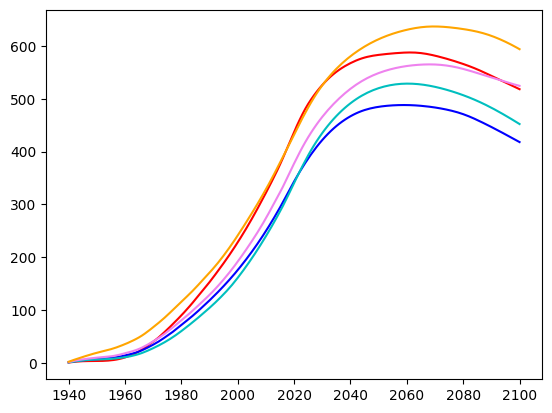

In [51]:
scn='ssp119'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  plt.plot(scendb.index.year,np.cumsum(scendb[scn][md]),label=md,color=cmap[md])

In [80]:
sspconc=pd.read_excel('SSPconc.xlsx',index_col=0)
sspconc[scn].iloc[190:351]

1940    311.356964
1941    311.810974
1942    312.171967
1943    312.389984
1944    312.412964
           ...    
2096    398.407013
2097    397.206024
2098    395.989014
2099    394.756012
2100    393.506012
Name: ssp119, Length: 161, dtype: float64

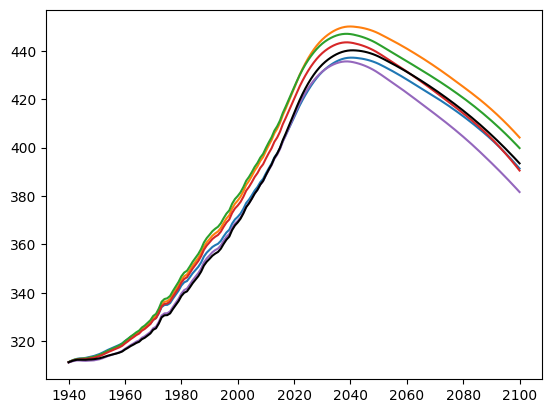

In [95]:
for i,md in enumerate(use):
    plt.plot(sspconc[scn].iloc[190:351].index,sspconc[scn].iloc[190:351].values-np.cumsum((scendb[scn][md]-ssp_em[scn].iloc[175:336].values)/2.13/(44/12)))
plt.plot(sspconc[scn].iloc[190:351].index,sspconc[scn].iloc[190:351],'k')